In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader,Dataset
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms
import torchvision.transforms as T 
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt



/home/mark/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [28]:
data= pd.read_csv(r"/media/mark/New Volume1/ras/obejct_detection/computer_vision/data.csv")
data

,filename,width,height,class,x,y,xmax,ymax,b_width,b_height,label
0,E:/ras/Vegetation.v1i.tensorflow/train/d57f29d...,1024,321,Tree,255.00,0.00,652.00,159.00,397.0,159.0,0
1,E:/ras/Red-billed-quelea-8/select/253_png.rf.9...,640,640,quelea,183.38,354.94,239.30,436.59,55.9,81.6,1
2,E:/ras/Vegetation.v1i.tensorflow/train/c3d2b1f...,1024,683,Tree,29.00,293.00,135.00,346.00,106.0,53.0,0
3,E:/ras/Red-billed-quelea-8/select/339_jpg.rf.a...,640,640,quelea,301.56,199.08,527.05,427.27,225.5,228.2,1
4,E:/ras/Red-billed-quelea-8/select/232_jpg.rf.f...,640,640,quelea,57.77,77.71,181.48,269.21,123.7,191.5,1
...,...,...,...,...,...,...,...,...,...,...,...
3838,E:/ras/Vegetation.v1i.tensorflow/train/640ee48...,1024,768,Tree,987.00,244.00,1023.00,460.00,36.0,216.0,0
3839,E:/ras/Vegetation.v1i.tensorflow/train/5786b23...,1024,768,Tree,836.00,0.00,1023.00,765.00,187.0,765.0,0
3840,E:/ras/Vegetation.v1i.tensorflow/train/0f3c301...,1024,768,Tree,386.00,456.00,407.00,486.00,21.0,30.0,0
3841,E:/ras/Vegetation.v1i.tensorflow/train/7c2850b...,1024,681,Tree,479.00,0.00,658.00,72.00,179.0,72.0,0


In [29]:
data['filename'][1]

'E:/ras/Red-billed-quelea-8/select/253_png.rf.90e43826b3a9430e49636829b1e827a2.jpg'

In [30]:
new_root = '/media/mark/New Volume1'
data['filename'][13][2:]
change_root=[]
for i in data['filename']:
    root = new_root+ i[2:]
    change_root.append(root)

In [31]:
data['filename']= change_root

In [32]:
data.head()

,filename,width,height,class,x,y,xmax,ymax,b_width,b_height,label
0,/media/mark/New Volume1/ras/Vegetation.v1i.ten...,1024,321,Tree,255.00,0.00,652.00,159.00,397.0,159.0,0
1,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,183.38,354.94,239.30,436.59,55.9,81.6,1
2,/media/mark/New Volume1/ras/Vegetation.v1i.ten...,1024,683,Tree,29.00,293.00,135.00,346.00,106.0,53.0,0
3,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,301.56,199.08,527.05,427.27,225.5,228.2,1
4,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,57.77,77.71,181.48,269.21,123.7,191.5,1


In [118]:
house=data[data['label']==2]
tree = data[data['label'] ==0]
quelea = data[data['label']==1]


In [174]:
data['label']

0       0
1       1
2       0
3       1
4       1
       ..
3838    0
3839    0
3840    0
3841    0
3842    0
Name: label, Length: 3843, dtype: int64

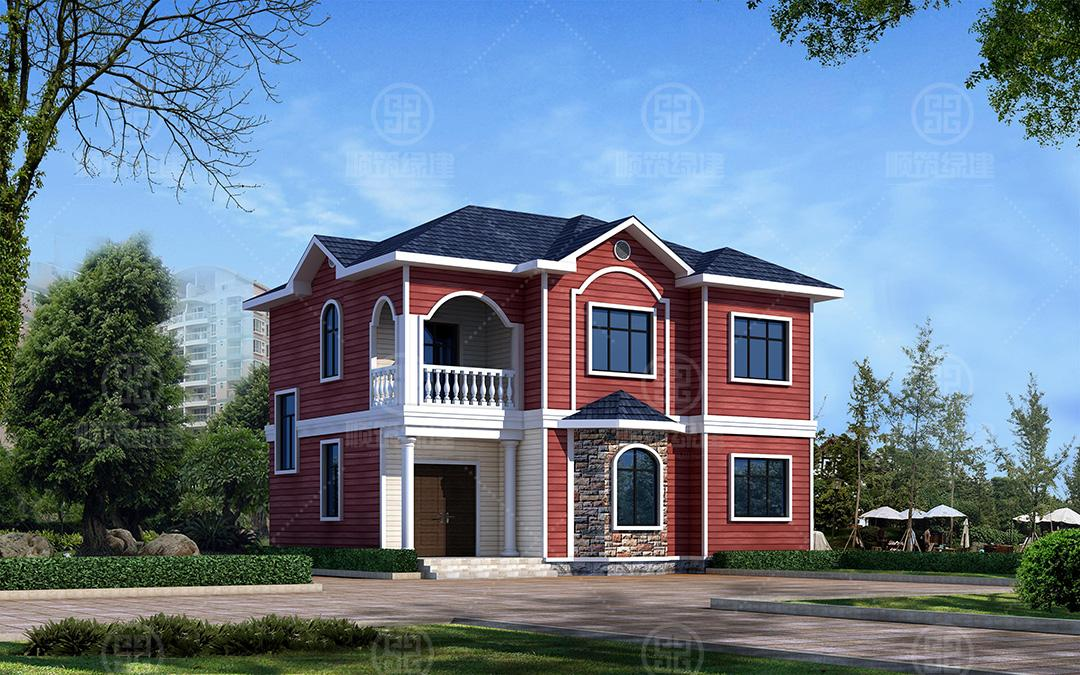

In [35]:
from IPython.display import Image
Image(data['filename'][10])

In [31]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
num_class = 4 #classes + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the head of the model with new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_class)

/home/mark/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mark/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [178]:
from PIL import Image
class CustomDataset(Dataset):
    def __init__(self,dataframe):
        self.df= dataframe
        self.transformation = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224,0.225]
            )
        ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self,idx):
        row = self.df.iloc[idx]

        image_path = row['filename']
        image = Image.open(image_path).convert('RGB')

        orig_w, orig_h =image.size
        # original bounding box
        x,y,w,h = row['x'], row['y'],row['b_width'], row['b_height']
        x1 ,y1,x2,y2= x,y,x+w,y+h

        image= self.transformation(image)
        scale_x = 224/orig_w
        scale_y = 224/orig_h

        x1*= scale_x
        y1*= scale_y
        x2*=scale_x
        y2*=scale_y

        boxes = torch.tensor([[x1,y1,x2,y2]], dtype=torch.float32)

        label = torch.tensor([row["label"]],dtype=torch.int32)

        target = {
            'boxes': boxes,
            'labels':label
        }

        return image ,target


In [179]:
def collate_fn(batch):
    images= [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return images, targets

train_data = data.sample(frac=0.8,random_state=42).reset_index(drop=True)
val_data = data.drop(train_data.index).reset_index(drop=True)

train_dataset = CustomDataset(train_data)
val_datset = CustomDataset(val_data)

train_loader= DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    collate_fn=collate_fn
)
val_loader = DataLoader(
    val_datset,
    batch_size=32,
    shuffle=False,
    collate_fn=collate_fn
)

In [180]:
for batch in train_loader:
    img= batch[0]
    target = batch[1]
    print(img[0].shape)
    print(target[0])
    break


torch.Size([3, 224, 224])
{'boxes': tensor([[150.2812,  36.3085, 173.9062,  53.8771]]), 'labels': tensor([0], dtype=torch.int32)}


In [98]:
# move to GPU if avaliable
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [ ]:
model.to(device)

# setup the optimizer
params = [p for  p in model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params=params, lr= 0.005)

lr_schudeler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3,gamma=0.1)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss =0.0

    for images, targets in train_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k,v in t.items()} for t in targets]

        # zero gradients
        optimizer.zero_grad()

        # forward pass
        loss_dict = model(images,targets)

        losses = sum(loss for loss in loss_dict.values())

        # backward pass
        losses.backward()
        optimizer.step()

        train_loss+=losses.item()

    lr_schudeler.step()
    print(f'Epoch:{epoch+1}, loss{train_loss/ len(train_loader)}')
print("Training complete")

# Model inference

In [50]:
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
num_class = 4 #classes + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the head of the model with new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_class)
state_dict =torch.load(r"/media/mark/New Volume1/ras/obejct_detection/Fast_rcnn_V1.pth",map_location='cpu')
model.load_state_dict(state_dict)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [175]:
from PIL import Image
import cv2
def image_preprocessing(img):
  img = Image.open(img).convert('RGB')
  original_w, original_h = img.size
  scale_x = 224/original_w
  scale_y = 224/original_h
  
  trans = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor(),
      transforms.Normalize(
          mean=[0.485,0.456, 0.406],
          std=[0.229,0.224,0.225]
      )
  ])
  return trans(img)

In [121]:
quelea

,filename,width,height,class,x,y,xmax,ymax,b_width,b_height,label
1,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,183.38,354.94,239.30,436.59,55.9,81.6,1
3,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,301.56,199.08,527.05,427.27,225.5,228.2,1
4,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,57.77,77.71,181.48,269.21,123.7,191.5,1
7,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,124.56,88.67,300.11,329.92,175.6,241.2,1
12,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,55.88,148.59,119.58,192.35,63.7,43.8,1
...,...,...,...,...,...,...,...,...,...,...,...
3821,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,5.39,236.10,495.57,565.69,490.2,329.6,1
3824,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,370.79,229.23,452.64,291.14,81.8,61.9,1
3827,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,458.52,113.60,509.36,193.35,50.8,79.8,1
3833,/media/mark/New Volume1/ras/Red-billed-quelea-...,640,640,quelea,480.55,482.44,623.00,622.11,142.4,139.7,1


In [176]:
img= image_preprocessing(quelea['filename'][2])
img = img.unsqueeze(0)

model.eval()
with torch.no_grad():
    predictions = model(img)

In [136]:
house = house.reset_index(drop=True)
tree =tree.reset_index(drop=True)
quelea= quelea.reset_index(drop=True)

In [160]:
img,scale_x,scale_y= image_preprocessing(quelea['filename'][2])


In [161]:
see =Image.open(quelea['filename'][2])
f,g= see.size
f,g

(640, 640)

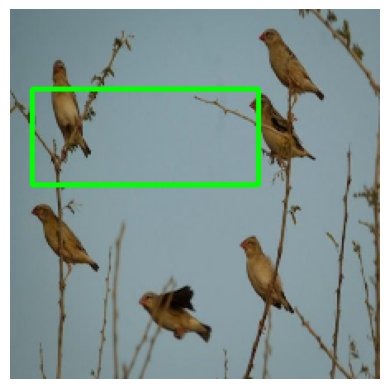

In [168]:
_,scale_x,scale_y= image_preprocessing(quelea['filename'][2])
scale_x, scale_y
x,y,z,w=predictions[0]['boxes'][3]

_,scale_x,scale_y= image_preprocessing(quelea['filename'][2])
see = cv2.imread(quelea['filename'][2])
see = cv2.resize(see,(224,224))
cv2.rectangle(see,(int(x),int(y)),(int(w),int(z)),(0,255,0),2)
see = cv2.cvtColor(see, cv2.COLOR_BGR2RGB)
plt.imshow(see)
plt.axis('off')
plt.show()

In [169]:
predictions[0]['labels']

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])

In [170]:
predictions[0]['boxes'][:2]

tensor([[121.9337,  18.2522, 221.4764, 205.6231],
        [  0.0000,  40.0874, 112.5425, 208.1210]])

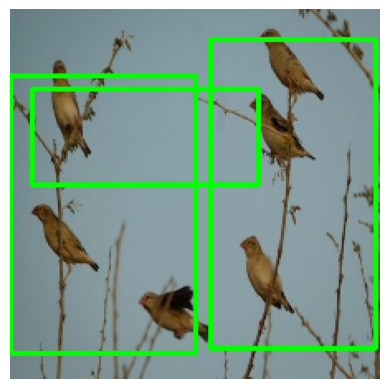

In [172]:
for i in predictions[0]['boxes'][:1]:
    x,y,w,z=i
    cv2.rectangle(see,(int(x),int(y)),(int(w),int(z)),(0,255,0),2)
plt.imshow(see)
plt.axis('off')
plt.show()

In [233]:
plt.figure(figsize=(10,20))
def display_10_pred(img_paths:list):
    model.eval()
    boxes =[]
    # run the model
    for t in img_paths:
        q = image_preprocessing(t)
        q= q.unsqueeze(0)
        with torch.no_grad():
            p = model(q)
            boxes.append(p[0]['boxes'])
    # draw the bobunding boxes
    for idx,im in enumerate(img_paths):
        plt.subplot(2,5,idx+1)
        i= cv2.imread(im)
        i= cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
        i= cv2.resize(i,(224,224))
        for b in boxes[idx][:2]:
            x1,y1,x2,y2= b
            cv2.rectangle(i, (int(x1),int(y1)), (int(x2),int(y2)), (0,255,0),2)
        plt.imshow(i)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

            

<Figure size 1000x2000 with 0 Axes>

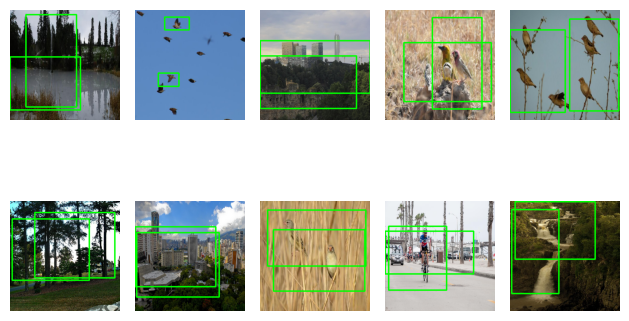

In [234]:
display_10_pred(data['filename'][:10])